In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge

In [2]:
df: pd.DataFrame = pd.read_csv(('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'))

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.columns.tolist()

['Make',
 'Model',
 'Year',
 'Engine Fuel Type',
 'Engine HP',
 'Engine Cylinders',
 'Transmission Type',
 'Driven_Wheels',
 'Number of Doors',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

## 1

In [5]:
features = ["Make", "Model" ,"Year" ,"Engine HP", "Engine Cylinders", "Transmission Type", "Vehicle Style", "highway MPG","city mpg", "MSRP"]
df = df[features].copy()
df.columns = df.columns.str.replace(" ","_").str.lower()
df.rename(columns={"msrp":"price"},inplace=True)


In [6]:
df.columns.tolist()

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'price']

In [7]:
df.fillna(0, inplace=True)
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

In [8]:
df.transmission_type.mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

Most frequent value for `transmission_type` = AUTOMATIC


## 2

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [10]:
categorical = df.dtypes[df.dtypes =='object'].index.tolist()
numeric = df.columns.difference(categorical).tolist()

In [11]:
df[numeric].corr()

,city_mpg,engine_cylinders,engine_hp,highway_mpg,price,year
city_mpg,1.000000,-0.587306,-0.424918,0.886829,-0.157676,0.198171
engine_cylinders,-0.587306,1.000000,0.774851,-0.614541,0.526274,-0.040708
engine_hp,-0.424918,0.774851,1.000000,-0.415707,0.650095,0.338714
highway_mpg,0.886829,-0.614541,-0.415707,1.000000,-0.160043,0.258240
price,-0.157676,0.526274,0.650095,-0.160043,1.000000,0.227590
year,0.198171,-0.040708,0.338714,0.258240,0.227590,1.000000


biggest correlation = highway_mpg and city_mpg

## 3

In [12]:
price_mean= df.price.mean()
price_mean

40594.737032063116

In [13]:
df['above_average']= (df.price > price_mean).astype('int64')

In [14]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


In [15]:
x_features = df.columns.difference(["above_average"]).tolist()
data_y = df['above_average'].values
data_x = df.drop(labels=["price","above_average"],axis=1)

# data_x.drop("price")
np.random.seed(42)
x_train, x_test, y_train, test_y =train_test_split(data_x,data_y,test_size=0.2, random_state= 42)

x_train, x_val, y_train, y_val =train_test_split(x_train,y_train,test_size=0.25, random_state= 42)
# x_train.shape, x_val.shape, y_train.shape, y_val.shape

data_x.shape, data_y.shape, x_test.shape, test_y.shape,  x_train.shape, x_val.shape, y_train.shape, y_val.shape


((11914, 9),
 (11914,),
 (2383, 9),
 (2383,),
 (7148, 9),
 (2383, 9),
 (7148,),
 (2383,))

In [16]:
def mutual(series):
    return mutual_info_score(series, y_train)


mi = x_train[categorical].apply(mutual)
mi = mi.round(2).sort_values(ascending=False).to_frame()
mi


,0
model,0.46
make,0.24
vehicle_style,0.08
transmission_type,0.02


lowest mutual information score : transmission_type

## 4

In [17]:
train_dict = x_train.to_dict(orient="records")
dv = DictVectorizer(sparse=False)
dv.fit((train_dict))
X_train = dv.fit_transform((train_dict))

model = LogisticRegression(solver='liblinear',C=10, max_iter=1000, random_state=42 )
model.fit(X_train,y_train) 

val_dict = x_val.to_dict(orient='records')

X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

score_original = accuracy_score(y_val,y_pred)
score_original

0.9345362987830466

## 5

In [18]:
data_x.columns.tolist()

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg']

In [19]:
table = pd.DataFrame(columns=["feature","difference","accuracy w/o feature"])
dat = {}
for feature in data_x.columns.tolist():
    features  = data_x.columns.tolist().copy()
    features.remove(feature)

    train_dict = x_train[features].to_dict(orient="records")
    dv = DictVectorizer(sparse=False)
    dv.fit((train_dict))
    X_train = dv.fit_transform((train_dict))

    model = LogisticRegression(solver='liblinear',C=10, max_iter=1000, random_state=42 )
    model.fit(X_train,y_train) 

    val_dict = x_val[features].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)
    score = accuracy_score(y_val,y_pred)
    
    dat[feature] = {"difference": np.abs(score_original - score), "accuracy w/o feature": score}

table = pd.DataFrame(data=dat.values(), index=dat.keys()).sort_values("difference", ascending=True)
table
       

,difference,accuracy w/o feature
vehicle_style,0.001679,0.932858
engine_hp,0.004616,0.929920
model,0.010491,0.924045
make,0.010491,0.945027
engine_cylinders,0.011330,0.945867
transmission_type,0.011330,0.945867
city_mpg,0.011330,0.945867
highway_mpg,0.012170,0.946706
year,0.013009,0.947545


The smallest difference in accuracy = engine_hp

engine_hp gives the least difference

## 6

In [20]:
x_features = df.columns.difference(["above_average"]).tolist()
data_y = np.log1p(df['price'].values)
data_x = df.drop(labels=["above_average"],axis=1)

np.random.seed(42)
x_train, x_test, y_train, test_y =train_test_split(data_x,data_y,test_size=0.2, random_state= 42)

x_train, x_val, y_train, y_val =train_test_split(x_train,y_train,test_size=0.25, random_state= 42)

/Users/air/anaconda3/envs/mlzoomcamp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/air/anaconda3/envs/mlzoomcamp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

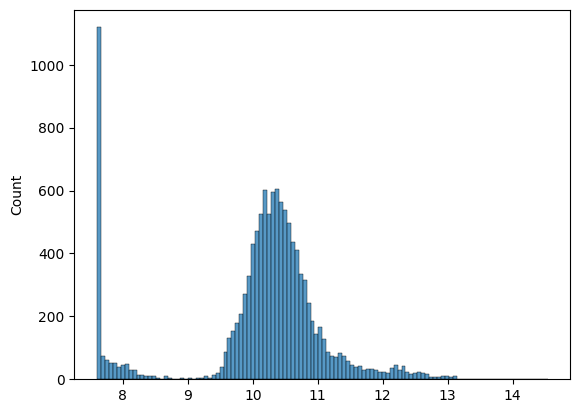

In [21]:
sns.histplot((data_y))

In [22]:
# table = pd.DataFrame(columns=["feature","difference","accuracy w/o feature"])
dat = {}

for alpha in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(solver='sag',alpha= alpha, random_state=42, max_iter= 10000)

    train_dict = x_train[features].to_dict(orient="records")
    dv = DictVectorizer(sparse=False)
    dv.fit((train_dict))
    X_train = dv.fit_transform((train_dict))

    model.fit(X_train,y_train)

    val_dict = x_val[features].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)
    score = np.round(np.sqrt(mean_squared_error(y_val,y_pred)),3)
    
    dat[alpha] = {"RMSE": score}

table2 = pd.DataFrame(data=dat.values(), index=dat.keys()).sort_values("RMSE", ascending=True)
table2
       

    